<a href="https://colab.research.google.com/github/JoseFBG/CIENCIA_DATOS_2025/blob/main/Dataset_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Final_data.csv" # Updated file path

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jockeroika/life-style-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3234178377.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'life-style-data' dataset.
First 5 records:      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pc

In [3]:
import os

# List the files in the dataset directory
dataset_path = "/kaggle/input/life-style-data"
if os.path.exists(dataset_path):
    print("Files in the dataset directory:")
    for file in os.listdir(dataset_path):
        print(file)
else:
    print(f"Dataset directory not found at {dataset_path}")

Files in the dataset directory:
Final_data.csv
meal_metadata.csv


##¿Cómo influye el ejercicio físico en el IMC y las calorías quemadas?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Selección de columnas relevantes

In [21]:
print("Forma del dataset:", df.shape)
print("\nColumnas del dataset:")
print(df.columns.tolist())

Forma del dataset: (20000, 54)

Columnas del dataset:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']


Verificación básica del dataset

In [22]:
df_relevante = df[['Physical exercise', 'Workout_Frequency (days/week)', 'BMI', 'Calories_Burned', 'Gender', 'Age']].copy()

Ver los primeros registros

In [23]:
print("\nPrimeras filas:")
print(df_relevante.head())


Primeras filas:
   Physical exercise  Workout_Frequency (days/week)    BMI  Calories_Burned  \
0               0.01                           3.99  24.87          1080.90   
1               0.97                           4.00  23.48          1809.91   
2              -0.02                           2.99  21.15           802.26   
3               0.04                           3.99  32.45          1450.79   
4               3.00                           4.00  14.83          1166.40   

   Gender    Age  
0    Male  34.91  
1  Female  23.37  
2  Female  33.20  
3  Female  38.69  
4    Male  45.09  


Información general

In [24]:
print("\nInformación general del DataFrame:")
print(df_relevante.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Physical exercise              20000 non-null  float64
 1   Workout_Frequency (days/week)  20000 non-null  float64
 2   BMI                            20000 non-null  float64
 3   Calories_Burned                20000 non-null  float64
 4   Gender                         20000 non-null  object 
 5   Age                            20000 non-null  float64
dtypes: float64(5), object(1)
memory usage: 937.6+ KB
None


Estadísticas descriptivas

In [25]:
print("\nEstadísticas descriptivas:")
print(df_relevante.describe())


Estadísticas descriptivas:
       Physical exercise  Workout_Frequency (days/week)           BMI  \
count       20000.000000                   20000.000000  20000.000000   
mean            0.452503                       3.318629     24.921680   
std             0.986628                       0.911198      6.701126   
min            -0.070000                       1.940000     12.040000   
25%            -0.010000                       2.980000     20.097500   
50%             0.010000                       3.010000     24.120000   
75%             0.040000                       4.000000     28.560000   
max             4.050000                       5.060000     50.230000   

       Calories_Burned           Age  
count     20000.000000  20000.000000  
mean       1280.109600     38.851453  
std         502.228982     12.114580  
min         323.110000     18.000000  
25%         910.800000     28.170000  
50%        1231.450000     39.865000  
75%        1553.112500     49.630000  
ma

LIMPIEZA DE DATOS

In [26]:
print("\nValores nulos por columna:")
print(df_relevante.isnull().sum())


Valores nulos por columna:
Physical exercise                0
Workout_Frequency (days/week)    0
BMI                              0
Calories_Burned                  0
Gender                           0
Age                              0
dtype: int64


Eliminamos filas con valores nulos para simplificar

In [ ]:
df_relevante = df_relevante.dropna()

DISTRIBUCIONES

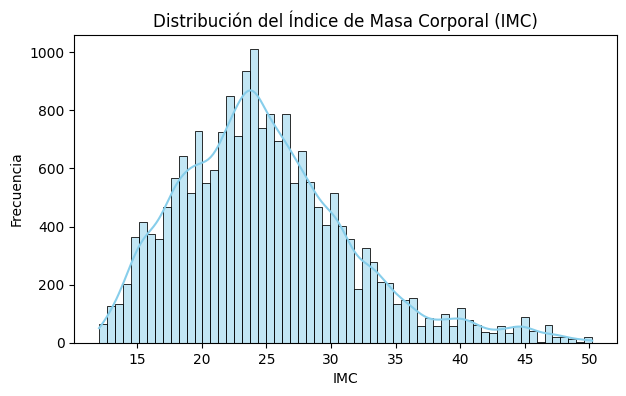

In [27]:
plt.figure(figsize=(7,4))
sns.histplot(df_relevante['BMI'], kde=True, color='skyblue')
plt.title("Distribución del Índice de Masa Corporal (IMC)")
plt.xlabel("IMC")
plt.ylabel("Frecuencia")
plt.show()

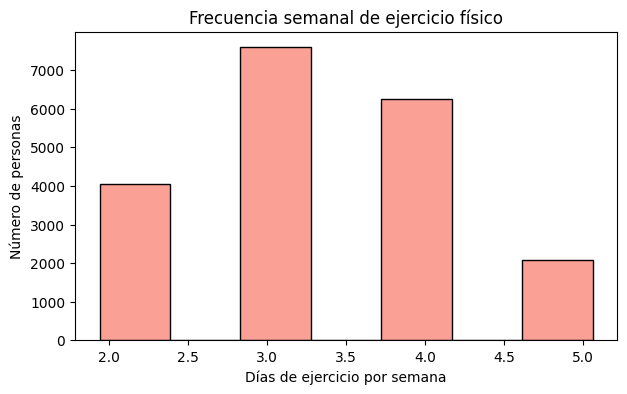

In [28]:
plt.figure(figsize=(7,4))
sns.histplot(df_relevante['Workout_Frequency (days/week)'], kde=False, bins=7, color='salmon')
plt.title("Frecuencia semanal de ejercicio físico")
plt.xlabel("Días de ejercicio por semana")
plt.ylabel("Número de personas")
plt.show()

RELACIÓN ENTRE EJERCICIO Y IMC

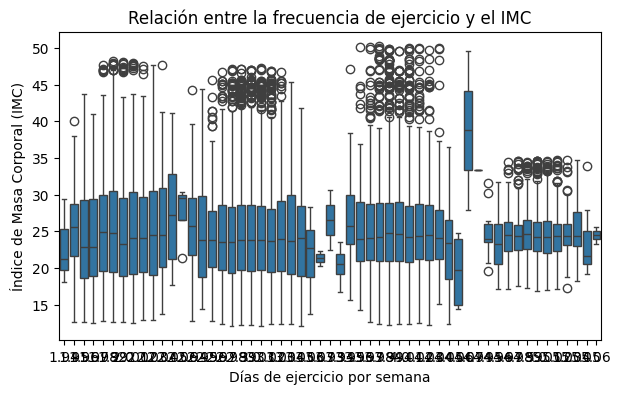

In [29]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Workout_Frequency (days/week)', y='BMI', data=df_relevante)
plt.title("Relación entre la frecuencia de ejercicio y el IMC")
plt.xlabel("Días de ejercicio por semana")
plt.ylabel("Índice de Masa Corporal (IMC)")
plt.show()

RELACIÓN ENTRE EJERCICIO Y CALORÍAS QUEMADAS

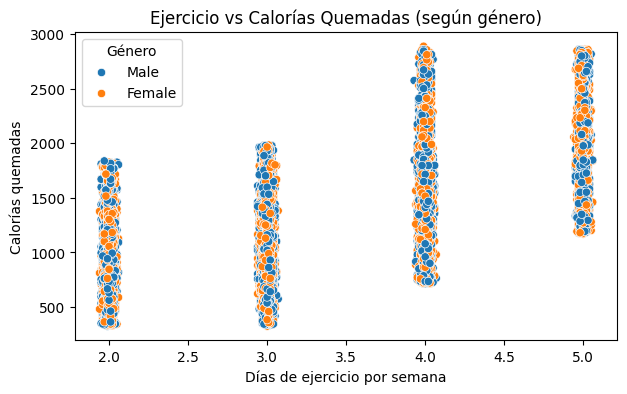

In [30]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Workout_Frequency (days/week)', y='Calories_Burned', hue='Gender', data=df_relevante)
plt.title("Ejercicio vs Calorías Quemadas (según género)")
plt.xlabel("Días de ejercicio por semana")
plt.ylabel("Calorías quemadas")
plt.legend(title="Género")
plt.show()

CORRELACIÓN ENTRE VARIABLES NUMÉRICAS

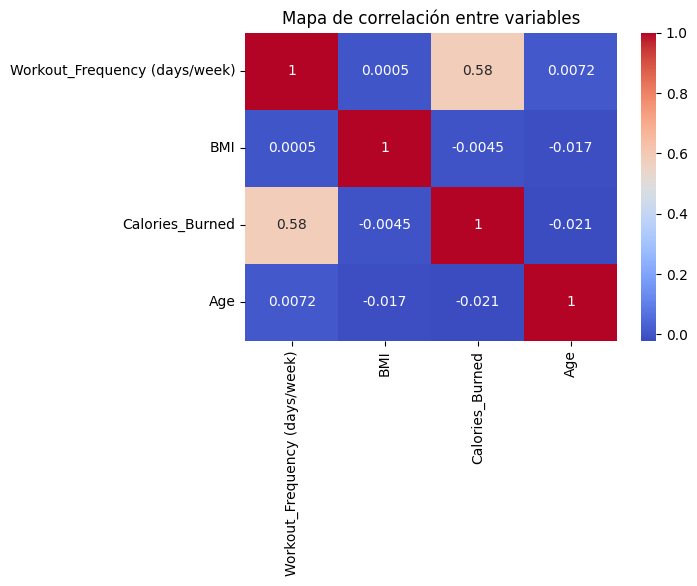

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(df_relevante[['Workout_Frequency (days/week)', 'BMI', 'Calories_Burned', 'Age']].corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación entre variables")
plt.show()